In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

In [2]:
desc = pd.read_csv("../IDHBrazil/desc.csv", delimiter=",")
atlas = pd.read_csv("../IDHBrazil/atlas.csv", delimiter=",")


In [3]:
# Human Development Indexes and Census data for Brazilian municipalities
desc.head()


,SIGLA,nome curto,nome longo,definição,cat,short name,long name,definition
0,uf,Código da Unidade da Federação,Código da Unidade da Federação,Código utilizado pelo IBGE para identificação do estado.,categorical,Federation Unit Code,Federation Unit Code,Code used by the IBGE to identify the State.
1,ufn,Nome da Unidade da Federação,Nome da Unidade da Federação,Nome da Unidade da Federação.,categorical,Name of the Federation Unit,Name of the Federation Unit,Name of the unit of the Federation.
2,codmun6,Código do Município,Código do Município,Código utilizado pelo IBGE para identificação do município.,categorical,Code of the Municipality,Code of the Municipality,Code used by the IBGE to identify the municipality.
3,codmun7,Código do Município,Código do Município,Código utilizado pelo IBGE para identificação do município(com digito verificador).,categorical,Code of the Municipality,Code of the Municipality,Code used by IBGE for identification of the municipality (with type checker).
4,nomemun,Nome do Município,Nome do município,Nome do município.,categorical,Municipality name,Municipality name,Municipality name


In [4]:
# Lets take a look at what kinds of variables were collected
siglas = desc["SIGLA"]
names = desc["long name"]

for i in range(len(desc)):
    print("{} : {} \n".format(siglas[i], names[i]))

uf : Federation Unit Code 

ufn : Name of the Federation Unit 

codmun6 : Code of the Municipality 

codmun7 : Code of the Municipality 

nomemun : Municipality name 

espvida : Life expectancy at birth 

fectot : Total fertility rate 

mort1 : Mortality up to one year old 

mort5 : Mortality up to five years of age 

razdep : Percentage of the population aged less than 15 years and the population aged 65 and over in relation to the population aged 15-64 

sobre40 : Probability of survival up to 40 years 

sobre60 : Probability of survival up to 60 years 

t_env : Aging rate 

e_anosestudo : Expectancy of years of study at 18 years of age 

t_analf11a14 : Illiteracy rate of the population aged 11 to 14 years 

t_analf15a17 : Illiteracy rate of the population aged 15 to 17 years old 

t_analf15m : Illiteracy rate of the population aged 15 years and over 

t_analf18a24 : Illiteracy rate of the population aged 18-24 years 

t_analf18m : Illiteracy rate of the population aged 18 years and 

In [5]:
atlas[50:60]

,ano,codmun6,uf,codmun7,município,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
50,1991,110175,11,1101757,VALE DO ANARI,59.95,4.00,53.47,67.95,75.27,81.40,63.05,1.41,3.54,13.33,9.56,29.05,14.33,31.91,22.63,37.80,19.46,21.70,0.00,20.92,23.32,0.0,59.63,54.98,0.00,44.36,53.12,0.00,0.00,0.00,38.80,41.67,0.00,0.00,0.00,NaN,44.36,27.73,13.32,0.00,NaN,NaN,11.20,16.58,43.13,40.59,24.27,13.32,NaN,0.00,0.00,0.0,7.48,8.88,0.00,3.26,5.72,3.29,2.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.80,47.01,125.36,282.06,0.75,65.98,68.02,82.12,87.83,89.58,94.23,61.03,0.00,77.04,1.06,7.48,22.96,94.34,230.83,145.69,104.05,0.00,635.09,5.50,33.43,80.50,400.83,155.19,16.59,32.33,43.79,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.65,2.38,57.19,0.00,9.38,5.98,NaN,NaN,NaN,56.87,47.78,41.44,NaN,2.96,0.00,2.95,NaN,NaN,4.15,90.62,313,386,328,253,201,166,143,157,115,112,81,370,61,22,8,11,2729,2,300,344,243,170,179,135,115,126,75,65,45,324,28,14,6,4,2,2175,NaN,NaN,NaN,NaN,118,570,439,412,374,2867,366,994,362,2501,303,628,265,1873,121,137,128,717,1653,69,344,77,1207,794,4904,4904,0,NaN,NaN,NaN,NaN,4875,3269,0.033,0.047,0.216,0.042,0.583,0.412
51,1991,110180,11,1101807,VALE DO PARAÍSO,63.84,3.54,39.23,50.06,80.08,85.83,70.25,2.44,5.69,9.69,8.09,27.01,13.07,29.77,19.70,36.10,20.18,22.89,0.00,22.15,24.50,0.0,57.67,52.61,0.00,56.80,76.07,0.00,1.20,0.00,53.76,63.46,0.00,1.20,0.00,NaN,71.83,25.18,5.50,1.39,NaN,NaN,11.49,17.41,63.46,53.76,25.18,5.50,NaN,0.00,0.00,0.0,8.56,9.76,3.25,3.98,4.75,4.37,4.23,0.00,0.31,1.71,0.00,2.23,0.00,37.61,65.81,94.02,161.71,282.06,0.50,41.75,48.34,72.41,79.55,89.25,92.84,38.51,4.07,54.88,12.05,24.70,45.12,93.94,12.78,9.11,125.04,25.43,481.46,49.93,79.08,127.63,343.11,126.37,38.84,62.15,83.50,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Since the data is incomplete lets add the names of the states:
atlas.insert(0, "ufs", "")
atlas.loc[atlas["uf"] == 11, ["ufs"]] = "RO"
atlas.loc[atlas["uf"] == 12, ["ufs"]] = "AC"
atlas.loc[atlas["uf"] == 13, ["ufs"]] = "AM"
atlas.loc[atlas["uf"] == 14, ["ufs"]] = "RR"
atlas.loc[atlas["uf"] == 15, ["ufs"]] = "PA"
atlas.loc[atlas["uf"] == 16, ["ufs"]] = "AP"
atlas.loc[atlas["uf"] == 17, ["ufs"]] = "TO"
atlas.loc[atlas["uf"] == 21, ["ufs"]] = "MA"
atlas.loc[atlas["uf"] == 22, ["ufs"]] = "PI"
atlas.loc[atlas["uf"] == 23, ["ufs"]] = "CE"
atlas.loc[atlas["uf"] == 24, ["ufs"]] = "RN"
atlas.loc[atlas["uf"] == 25, ["ufs"]] = "PB"
atlas.loc[atlas["uf"] == 26, ["ufs"]] = "PE"
atlas.loc[atlas["uf"] == 27, ["ufs"]] = "AL"
atlas.loc[atlas["uf"] == 28, ["ufs"]] = "SE"
atlas.loc[atlas["uf"] == 29, ["ufs"]] = "BA"
atlas.loc[atlas["uf"] == 31, ["ufs"]] = "MG"
atlas.loc[atlas["uf"] == 32, ["ufs"]] = "ES"
atlas.loc[atlas["uf"] == 33, ["ufs"]] = "RJ"
atlas.loc[atlas["uf"] == 35, ["ufs"]] = "SP"
atlas.loc[atlas["uf"] == 41, ["ufs"]] = "PR"
atlas.loc[atlas["uf"] == 42, ["ufs"]] = "SC"
atlas.loc[atlas["uf"] == 43, ["ufs"]] = "RS"
atlas.loc[atlas["uf"] == 50, ["ufs"]] = "MS"
atlas.loc[atlas["uf"] == 51, ["ufs"]] = "MT"
atlas.loc[atlas["uf"] == 52, ["ufs"]] = "GO"
atlas.loc[atlas["uf"] == 53, ["ufs"]] = "DF"
atlas.head()

,ufs,ano,codmun6,uf,codmun7,município,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,RO,1991,110001,11,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,6.68,9.74,8.35,23.55,10.82,25.71,15.59,31.39,30.32,33.34,53.26,24.96,27.33,16.63,44.72,39.33,30.11,62.66,76.98,10.28,8.69,0.28,57.69,65.24,3.60,8.69,0.28,NaN,66.19,31.22,8.93,6.10,NaN,NaN,17.29,25.00,65.42,58.08,26.48,4.16,NaN,2.01,0.00,0.00,17.32,22.77,5.84,7.09,12.74,11.65,11.21,3.21,4.31,4.74,3.91,4.91,0.65,39.18,70.52,117.53,235.05,352.58,0.63,39.21,47.11,65.55,71.89,83.15,87.03,52.46,2.26,66.65,7.56,16.90,33.35,96.53,27.75,17.63,198.46,22.46,1041.07,52.57,92.69,163.18,661.37,203.52,36.83,61.89,88.90,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.92,18.47,52.80,6.82,36.80,7.45,NaN,NaN,NaN,34.58,37.10,33.34,NaN,0.00,14.41,6.14,NaN,NaN,1.57,63.20,1684,1584,1413,1212,1109,923,711,521,464,395,327,1580,232,132,54,38,12401,25,1634,1479,1414,1089,980,766,578,440,364,288,219,1587,132,75,47,33,25,11146,NaN,NaN,NaN,NaN,700,2387,1816,1771,1986,14000,1742,5128,1709,12258,1571,3386,1467,8872,633,604,634,3238,7367,428,1479,730,6447,3944,14167,23546,9379,NaN,NaN,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,RO,1991,110002,11,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,7.86,9.35,7.64,17.18,8.00,18.37,10.55,22.32,37.37,40.76,45.41,25.11,26.42,44.13,37.52,32.82,10.45,69.79,82.18,25.02,17.94,2.09,62.78,69.19,11.63,17.94,0.71,NaN,73.34,41.92,13.56,4.15,NaN,NaN,28.59,37.29,70.03,63.94,26.95,6.13,NaN,4.61,0.28,0.38,32.53,41.93,13.67,17.45,22.30,19.98,19.08,4.67,6.30,10.17,5.73,11.67,3.13,72.08,133.98,214.90,419.96,656.26,0.57,18.90,25.47,41.30,52.24,65.78,74.41,44.91,2.62,61.27,9.12,19.77,38.73,94.73,19.69,13.43,319.47,41.90,1434.68,103.82,170.10,302.89,978

In [7]:
# There are many redundant variables, lets select some of the most interesting ones:
new = atlas[['uf', 'ufs', 'ano', 'município', 'gini', 'espvida', 'mort5', 'e_anosestudo', 't_analf18m', 't_fbbas', 't_fbfund', 't_fbmed', 't_fbpre', 't_fbsuper', 'rdpc', 'cpr', 'emp', 'p_agro', 't_ativ18m', 't_des', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r']]

In [8]:
new.head()

,uf,ufs,ano,município,gini,espvida,mort5,e_anosestudo,t_analf18m,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,rdpc,cpr,emp,p_agro,t_ativ18m,t_des,idhm,idhm_e,idhm_l,idhm_r
0,11,RO,1991,ALTA FLORESTA D'OESTE,0.63,62.01,58.05,6.68,25.71,62.66,76.98,10.28,8.69,0.28,198.46,NaN,NaN,NaN,NaN,NaN,0.329,0.112,0.617,0.516
1,11,RO,1991,ARIQUEMES,0.57,66.02,41.41,7.86,18.37,69.79,82.18,25.02,17.94,2.09,319.47,NaN,NaN,NaN,NaN,NaN,0.432,0.199,0.684,0.593
2,11,RO,1991,CABIXI,0.70,63.16,52.94,7.43,27.10,70.05,87.14,7.71,0.00,0.64,116.38,NaN,NaN,NaN,NaN,NaN,0.309,0.108,0.636,0.430
3,11,RO,1991,CACOAL,0.66,65.03,45.19,8.34,23.29,71.98,87.32,20.55,9.37,2.99,320.24,NaN,NaN,NaN,NaN,NaN,0.407,0.171,0.667,0.593
4,11,RO,1991,CEREJEIRAS,0.60,62.73,54.82,8.14,22.29,71.66,86.65,22.17,6.34,0.32,240.10,NaN,NaN,NaN,NaN,NaN,0.386,0.167,0.629,0.547


In [9]:
new.shape

(16695, 24)

In [10]:
# I'm planning to move soon, so I wanna check some specific cities before deing a more general analysis
goiania = new.loc[new["município"] == "GOIÂNIA"]
cities = goiania
floripa = new.loc[new["município"] == "FLORIANÓPOLIS"]
cities = cities.append(floripa)
curi = new.loc[new["município"] == "CURITIBA"]
cities = cities.append(curi)
camp = new.loc[new["município"] == "CAMPINAS"]
cities = cities.append(camp)

In [11]:
cities

,uf,ufs,ano,município,gini,espvida,mort5,e_anosestudo,t_analf18m,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,rdpc,cpr,emp,p_agro,t_ativ18m,t_des,idhm,idhm_e,idhm_l,idhm_r
5412,52,GO,1991,GOIÂNIA,0.57,68.06,26.85,9.14,8.95,95.58,112.27,48.27,30.82,13.60,693.72,NaN,NaN,NaN,NaN,NaN,0.600,0.420,0.718,0.717
10977,52,GO,2000,GOIÂNIA,0.61,72.73,24.61,10.09,5.54,113.45,121.44,93.16,47.25,26.49,1001.94,23.52,5.73,1.68,71.96,12.04,0.715,0.591,0.796,0.776
16542,52,GO,2010,GOIÂNIA,0.58,75.28,14.97,10.08,3.46,98.52,104.86,81.99,56.86,53.34,1348.55,24.34,3.69,1.44,74.50,5.68,0.799,0.739,0.838,0.824
4397,42,SC,1991,FLORIANÓPOLIS,0.55,71.25,24.90,10.43,6.62,92.52,100.51,66.57,36.65,28.52,921.95,NaN,NaN,NaN,NaN,NaN,0.681,0.538,0.771,0.763
9962,42,SC,2000,FLORIANÓPOLIS,0.56,74.35,21.15,10.50,3.79,100.94,108.78,80.72,54.67,47.44,1383.78,21.56,5.27,1.62,68.53,12.47,0.766,0.660,0.823,0.828
15527,42,SC,2010,FLORIANÓPOLIS,0.54,77.35,12.14,10.79,2.14,96.47,103.50,78.28,62.82,73.12,1798.12,19.90,4.15,1.25,72.00,5.31,0.847,0.800,0.873,0.870
4004,41,PR,1991,CURITIBA,0.55,68.70,34.75,10.45,5.84,88.31,99.66,52.36,27.46,15.68,878.39,NaN,NaN,NaN,NaN,NaN,0.640,0.476,0.728,0.755
9569,41,PR,2000,CURITIBA,0.59,72.75,15.50,10.92,3.58,98.59,100.92,92.20,47.79,32.50,1225.28,22.32,5.51,0.63,71.14,14.22,0.750,0.655,0.796,0.809
15134,41,PR,2010,CURITIBA,0.55,76.30,13.58,10.95,2.22,100.59,106.40,84.78,64.99,58.71,1581.04,20.29,4.13,0.80,72.99,5.17,0.823,0.768,0.855,0.850
3374,35,SP,1991,CAMPINAS,0.53,69.74,26.73,9.85,8.02,90.88,101.56,55.71,24.42,17.75,995.15,NaN,NaN,NaN,NaN,NaN,0.618,0.408,0.746,0.775


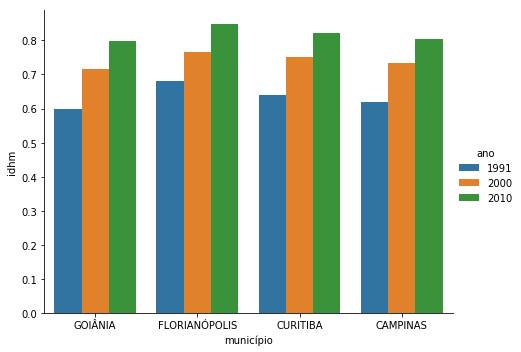

In [12]:
plot1 = sns.catplot(x="município", y="idhm", hue="ano", data=cities, aspect=1.3, height=5, kind="bar")

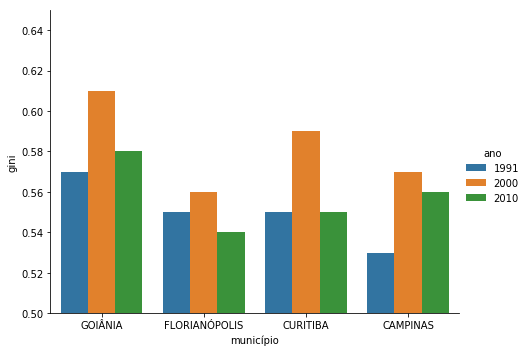

In [13]:
plot2 = sns.catplot(x="município", y="gini", hue="ano", data=cities, aspect=1.3, height=5, kind="bar")
plot2.set(ylim=(0.5, 0.65))

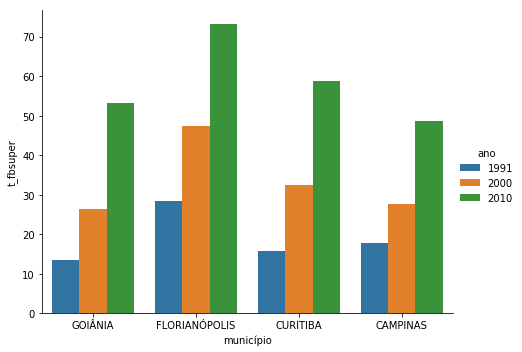

In [14]:
plot3 = sns.catplot(x="município", y="t_fbsuper", hue="ano", data=cities, aspect=1.3, height=5, kind="bar")

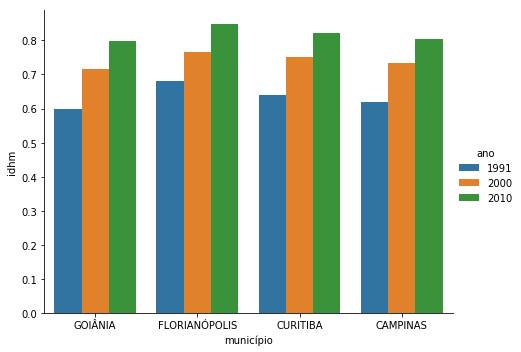

In [15]:
plot3 = sns.catplot(x="município", y="idhm", hue="ano", data=cities, aspect=1.3, height=5, kind="bar")

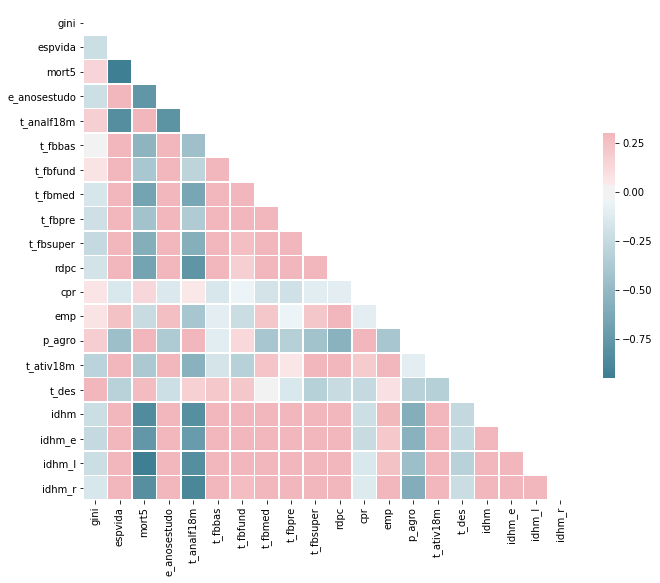

In [16]:
# Seems like these cities are similar, and experienced some growth over the past years

# All right, now lets actually explore the data

cordf = new.iloc[:, 3:]
corr = cordf.corr();
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


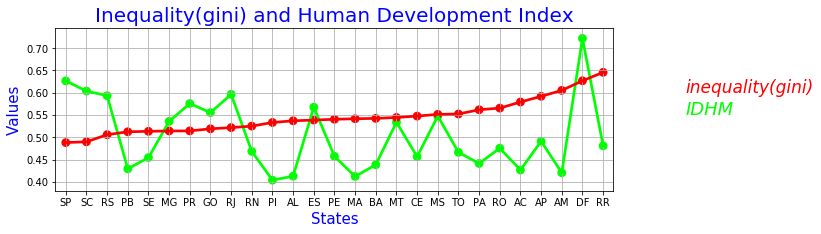

In [17]:
# Inequality is negatively correlated to almost every 'good' metric and positively correlated to infant mortality,
# illiteracy and unenployment... I knew Brazil had a problem with inequality but I didn't expect it to be this big.
# How do states compare to each other on inequality, and other metrics?

new["stateGini"] = 0.0
new["stateIdhm"] = 0.0
pd.set_option('mode.chained_assignment', None)
for value in (new["uf"].unique()):
    stateGiniMean = new["gini"].loc[new["uf"] == value].mean()
    stateIdhmMean = new["idhm"].loc[new["uf"] == value].mean()
    new["stateGini"].loc[new["uf"] == value] = stateGiniMean
    new["stateIdhm"].loc[new["uf"] == value] = stateIdhmMean
    
new.sort_values(by=['stateGini'], inplace=True) 

# visualize
f, ax1 = plt.subplots(figsize =(10, 3)) 
sns.pointplot(x='ufs', y='stateIdhm', data=new, color='lime', alpha=0.8)
sns.pointplot(x='ufs', y='stateGini', data=new, color='red', alpha=0.8)
plt.text(30,0.6, "inequality(gini)",color='red', fontsize = 17,style = 'italic')
plt.text(30,0.55,'IDHM',color='lime', fontsize = 18,style = 'italic')
plt.xlabel('States', fontsize = 15, color='blue')
plt.ylabel('Values', fontsize = 15, color='blue')
plt.title("Inequality(gini) and Human Development Index", fontsize = 20, color='blue')
plt.grid()




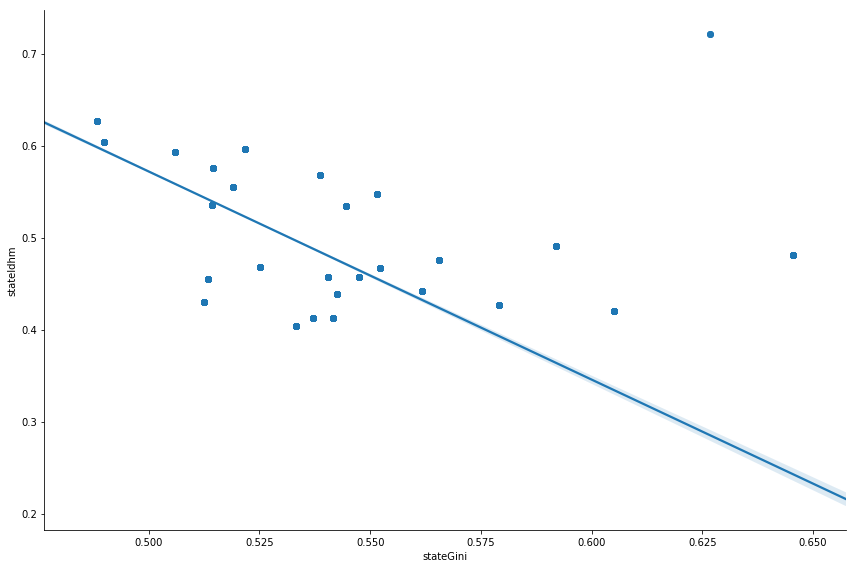

In [18]:
# 53 is kind of an outlier because it is the federal district that only houses the capital: Brasilia
sns.lmplot(x="stateGini", y= "stateIdhm", data=new, aspect=1.5, height = 8)

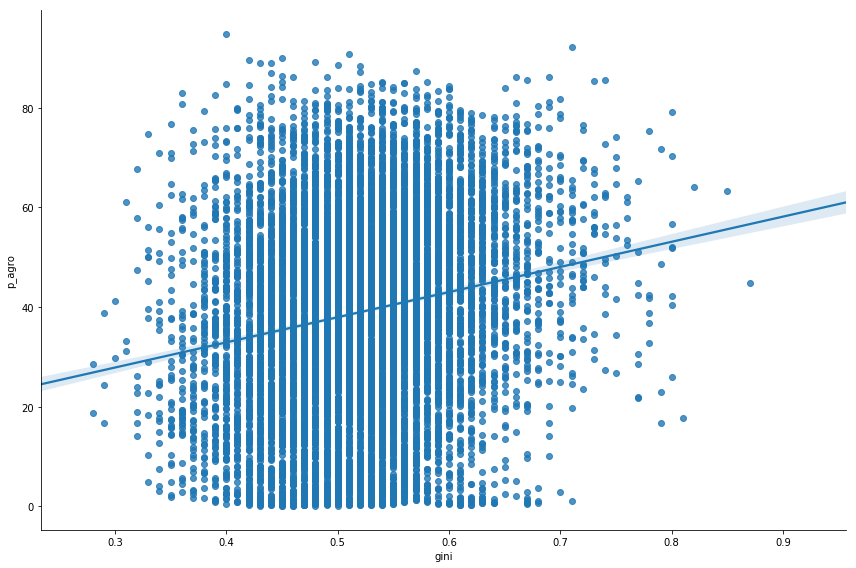

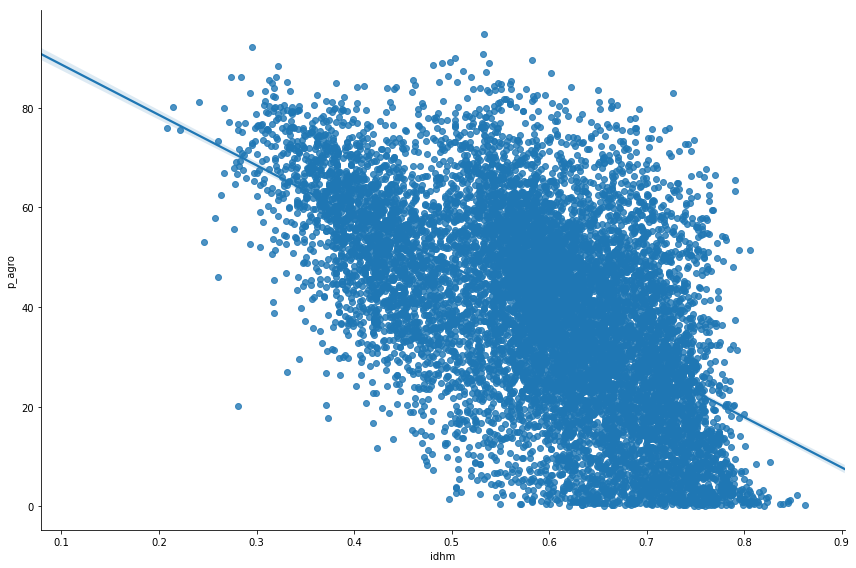

In [19]:
# It also seems like more urban states tend to be more developed, lets take a closer look:
sns.lmplot(x="gini", y= "p_agro", data=new, aspect=1.5, height = 8)
sns.lmplot(x="idhm", y= "p_agro", data=new, aspect=1.5, height = 8)

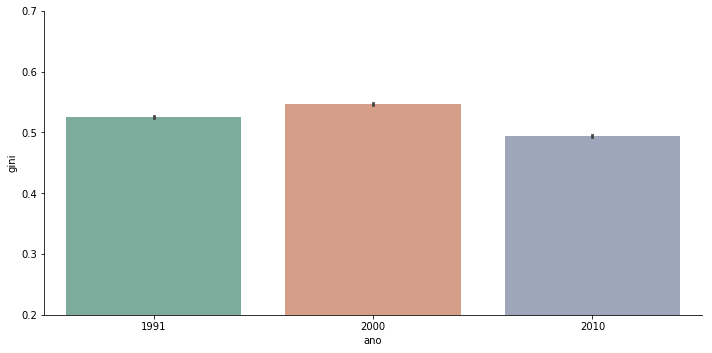

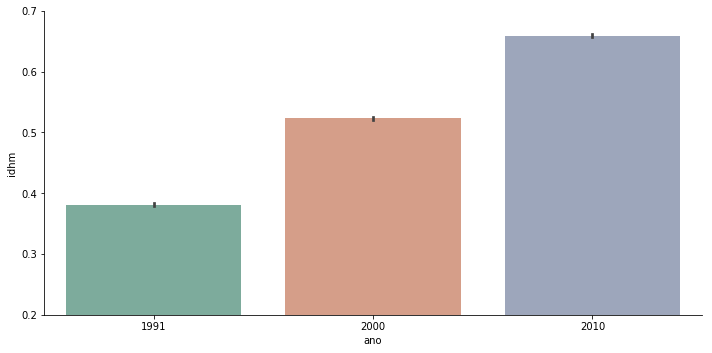

In [20]:
# Indeed, the less urban the state, the higher the inequality and lower the idhm
# Now lets take a look at how things have changed over the years
plot4 = sns.catplot(x="ano", y="gini", data=new, palette="Set2", height=5, kind="bar", saturation=.5, aspect=2)

plot4.set(ylim=(0.2, 0.7))

plot5 = sns.catplot(x="ano", y="idhm", data=new, palette="Set2", height=5, kind="bar", saturation=.5, aspect=2)

plot5.set(ylim=(0.2, 0.7))

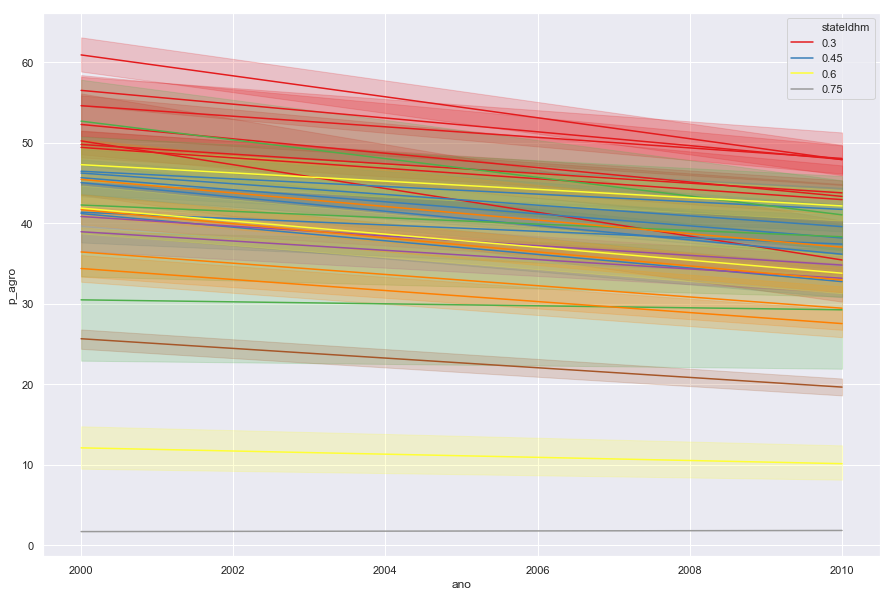

In [47]:
# Interesting... The human development index has risen a lot over the years
# But inequality hasen't changed much
# How has the urbanization moovement impacted the Idhm over time?

plt.figure(figsize=(15, 10))
plot6 = sns.lineplot(x="ano", y="p_agro", hue="stateIdhm", data=new, palette="Set1")




In [48]:
# As time passed most states became more urban, some more so than others.

# Conclusion:
# As time passes the IDHM seems to be getting better and better, as more and more places start to urbanize,
# altough the urbanized places seem to improove at a much slower rate.
# The urbanization process doesn't seem to improve inequality too much, but inequality seems to be highely correlated to 
# IDHM. Even tough this is only a correlational relationship, we don't know many causal relationships between IDHM and 
# other variables, therefore it seems like a good shot to try to at least find out if there is a causal relationship
# between inequality and IDHM.
# If indeed there is a causal relationship between inequality and quality of life, reducing it should be one of the best
# goals in order to increase human flurishing, as more and more places become urbanized, the rize in IDHM will probably 
# stagnate for a while, so we need to start to actively look for ways to get it back on track for everyones sake.
# Progress is happening, but it is not inevitable, everyone needs to do their part!



